In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [58]:
df = pd.read_csv('Mental-Health-Twitter.csv')







In [59]:
df.drop_duplicates(inplace=True)

In [60]:
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


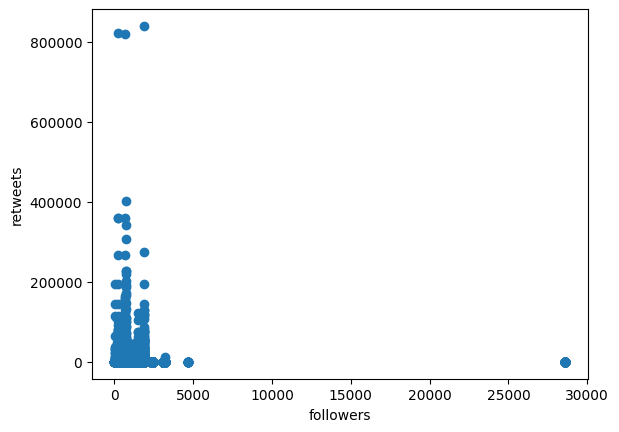

In [9]:
import matplotlib.pyplot as plt
#% matplotlib inline
#df['Date'] = pd.to_datetime(df['Date'])
x = df['followers'].values
y = df['retweets'].values
plt.scatter(x,y)
plt.xlabel('followers')
plt.ylabel('retweets')
plt.show()

<Axes: xlabel='friends', ylabel='followers'>

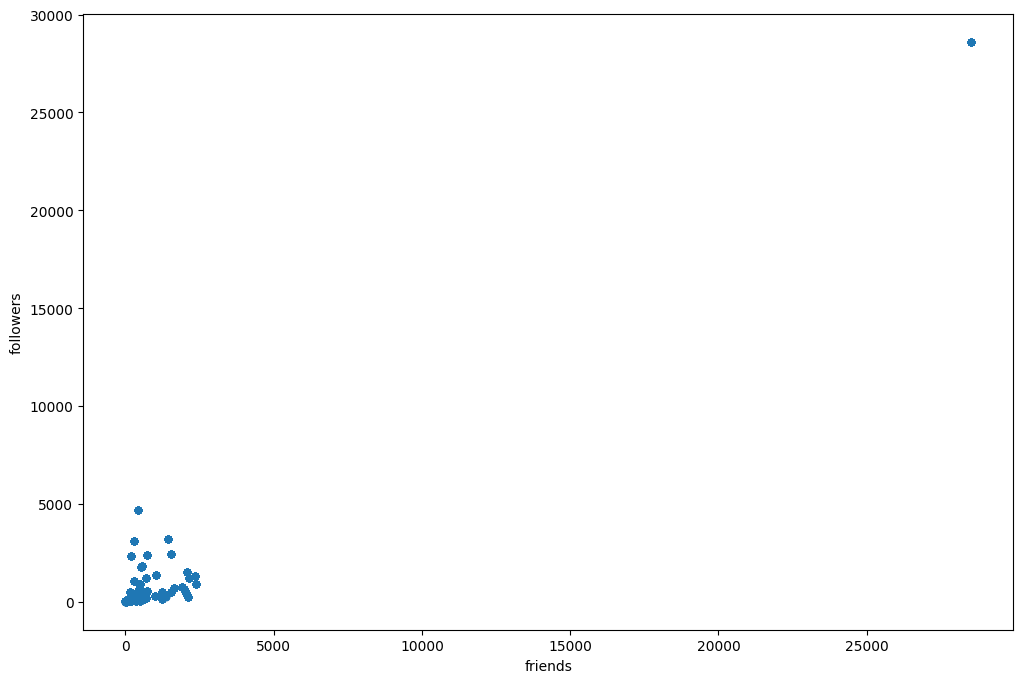

In [10]:
df.plot(kind='scatter', x='friends', y='followers', figsize=(12,8))

In [ ]:
# sns.countplot(df, x="retweets")

In [61]:
columns_to_drop = ['post_id', 'post_created', 'user_id']
df.drop(columns=columns_to_drop, inplace=True)

In [62]:
df.head()

,Unnamed: 0,post_text,followers,friends,favourites,statuses,retweets,label
0,0,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1
1,1,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1
2,2,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1
3,3,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1
4,4,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1


In [13]:
df.columns

Index(['Unnamed: 0', 'post_text', 'followers', 'friends', 'favourites',
       'statuses', 'retweets', 'label'],
      dtype='object')

In [63]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [64]:
df.head()

,post_text,followers,friends,favourites,statuses,retweets,label
0,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1
1,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1
2,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1
4,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1


In [70]:
# avg(df['friends'])
average_value_followers = df['followers'].mean()
average_value_friends = df['friends'].mean()
average_value_favourites = df['favourites'].mean()
average_value_statuses = df['statuses'].mean()
average_value_retweets = df['retweets'].mean()
# print(average_value)

In [71]:
# !pip install nltk

import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [72]:
def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

In [73]:
stop_words = set(stopwords.words('english'))

In [74]:
df['processed_text'] = df['post_text'].apply(preprocess_text)

In [75]:
scaler = StandardScaler()
df[['followers','friends','favourites','statuses','retweets']] = scaler.fit_transform(df[['followers', 'friends', 'favourites','statuses','retweets']])

In [76]:
df.head()

,post_text,followers,friends,favourites,statuses,retweets,label,processed_text
0,It's just over 2 years since I was diagnosed w...,-0.429759,-0.311444,-0.732436,-0.309412,-0.095105,1,years since diagnosed anxiety depression today...
1,"It's Sunday, I need a break, so I'm planning t...",-0.429759,-0.311444,-0.732436,-0.309412,-0.095039,1,sunday need break planning spend little time p...
2,Awake but tired. I need to sleep but my brain ...,-0.429759,-0.311444,-0.732436,-0.309412,-0.095105,1,awake tired need sleep brain ideas
3,RT @SewHQ: #Retro bears make perfect gifts and...,-0.429759,-0.311444,-0.732436,-0.309412,-0.094973,1,rt sewhq retro bears make perfect gifts great ...
4,It’s hard to say whether packing lists are mak...,-0.429759,-0.311444,-0.732436,-0.309412,-0.095039,1,hard say whether packing lists making life eas...


In [77]:
df.drop(columns=['post_text'],inplace=True)

In [78]:
max(df['followers'])

14.587086299153158

In [79]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_text = tfidf_vectorizer.fit_transform(df['processed_text']).toarray()

In [80]:
X_numerical = df[['followers', 'friends', 'favourites','statuses','retweets']].values

In [81]:
X_combined = np.concatenate((X_text, X_numerical), axis=1)

In [82]:
X_combined

array([[ 0.        ,  0.        ,  0.        , ..., -0.73243606,
        -0.30941161, -0.0951055 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.73243606,
        -0.30941161, -0.09503936],
       [ 0.        ,  0.        ,  0.        , ..., -0.73243606,
        -0.30941161, -0.0951055 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.76150838,
         7.23996862, -0.0951055 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.76150838,
         7.23996862, -0.0951055 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.76150838,
         7.23996862, -0.0951055 ]])

In [83]:

y=df['label']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [86]:

# RandomForestClassifier (as you've used before)
rf_classifier = RandomForestClassifier(n_estimators= 100,
    criterion= 'gini',
    max_depth= None,
    min_samples_split= 2,
    min_samples_leaf= 1,
    max_features= 100,
    random_state= 42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

# Support Vector Machine (SVM)
svm_classifier = SVC(C= 1.0,
    kernel='rbf',
    gamma= 'scale',
    degree= 3,
    random_state= 42)
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)

# Logistic Regression
logreg_classifier = LogisticRegression( C= 1.0,
    penalty= 'l2',
    solver= 'lbfgs',
    max_iter= 1000,
    random_state= 42)
logreg_classifier.fit(X_train, y_train)
logreg_pred = logreg_classifier.predict(X_test)

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors= 5,
    weights= 'uniform',
    p= 2)
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)

# Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)

# XGBoost
xgb_classifier = XGBClassifier(n_estimators= 100,
    learning_rate=0.1,
    max_depth= 3,
    subsample= 1.0,
    colsample_bytree= 1.0,
    gamma= 0,
    random_state= 42)
xgb_classifier.fit(X_train, y_train)
xgb_pred = xgb_classifier.predict(X_test)

# Evaluate each classifier
classifiers = {
    'Random Forest': rf_pred,
    'SVM': svm_pred,
    'Logistic Regression': logreg_pred,
    'KNN': knn_pred,
    'Naive Bayes': nb_pred,
    'XGBoost': xgb_pred
}

for name, predictions in classifiers.items():
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f'{name} - Accuracy: {accuracy:.2f}\n{report}\n')


Random Forest - Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       1.00      1.00      1.00      2019

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


SVM - Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1981
           1       0.93      0.98      0.96      2019

    accuracy                           0.95      4000
   macro avg       0.96      0.95      0.95      4000
weighted avg       0.96      0.95      0.95      4000


Logistic Regression - Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1981
           1       0.89      0.93      0.91      2019

    accuracy                           0.91      4000
   macro avg       0.91      0.91    

In [87]:
import joblib

In [88]:
joblib.dump(rf_classifier, 'model_rf.pkl')
joblib.dump(svm_classifier, 'model_svm.pkl')
joblib.dump(logreg_classifier, 'model_logreg.pkl')
joblib.dump(knn_classifier, 'model_knn.pkl')
joblib.dump(nb_classifier, 'model_nb.pkl')
joblib.dump(xgb_classifier, 'model_xgb.pkl')


['model_xgb.pkl']

In [89]:
model_rf = joblib.load('model_rf.pkl')
model_svm = joblib.load('model_svm.pkl')
model_logreg = joblib.load('model_logreg.pkl')
model_knn = joblib.load('model_knn.pkl')
model_nb = joblib.load('model_nb.pkl')
#model_xgb = XGBClassifier()
model_xgb=joblib.load('model_xgb.pkl')

In [101]:


def preprocess_other_columns(followers, friends, favourites, statuses, retweets, scaler):
    followers_normalized = (float(followers) - scaler.mean_[0]) / scaler.scale_[0]
    friends_normalized = (float(friends) - scaler.mean_[1]) / scaler.scale_[1]
    favourites_normalized = (float(favourites) - scaler.mean_[2]) / scaler.scale_[2]
    statuses_normalized = (float(statuses) - scaler.mean_[3]) / scaler.scale_[3]
    retweets_normalized = (float(retweets) - scaler.mean_[4]) / scaler.scale_[4]

    return np.array([followers_normalized, friends_normalized, favourites_normalized, statuses_normalized, retweets_normalized]).reshape(1, -1)






def predict_label(user_input, tfidf_vectorizer, scaler, stop_words,followers_input,friends_input,favourites_input,statuses_input,retweets_input):
    # Preprocess text
    preprocessed_text = preprocess_text(user_input)
    text_features = tfidf_vectorizer.transform([preprocessed_text]).toarray()

   

    

    # Preprocess other columns
    other_columns = preprocess_other_columns(followers_input, friends_input, favourites_input, statuses_input, retweets_input, scaler)

    # Concatenate features
    features = np.concatenate((other_columns, text_features), axis=1)

    # Make predictions using the available models
    prediction_rf = int(model_rf.predict(features)[0])
    prediction_svm = int(model_svm.predict(features)[0])
    prediction_logreg = int(model_logreg.predict(features)[0])
    prediction_knn = int(model_knn.predict(features)[0])
    prediction_nb = int(model_nb.predict(features)[0])
    prediction_xgb = int(model_xgb.predict(features)[0])
    
    # Majority voting (you can adjust this based on your criteria)
#     final_prediction=int()
    final_prediction = [prediction_rf,prediction_svm,prediction_logreg,prediction_knn,prediction_nb,prediction_xgb]
    
    return final_prediction




In [103]:
user_input=input("enter user_text")
# average_value_
followers=input("enter followers")
friends=input("enter friends")
favourites=input("enter favorites")
statuses=input("enter statuses")
retweets=input("enter retweets")

predict_label(user_input, tfidf_vectorizer, scaler, stop_words,followers,friends,favourites,statuses,retweets)


[1, 1, 0, 1, 1, 1]